# 1 Classification

## Machine learning with scikit-learn

### 2. What is machine learning?

Machine learning is the process whereby computers learn to make decisions from data without being explicitly programmed.

### 3. Examples of machine learning

For example, learning to predict whether an email is spam or not spam given its content and sender. Or learning to cluster books into different categories based on the words they contain, then assigning any new book to one of the existing clusters.

### 4. Unsupervised learning

Unsupervised learning is the process of uncovering hidden patterns and structures from unlabeled data. For example, a business may wish to group its customers into distinct categories based on their purchasing behavior without knowing in advance what these categories are. This is known as clustering, one branch of unsupervised learning.

### 5. Supervised learning

Supervised learning is a type of machine learning where the values to be predicted are already known, and a model is built with the aim of accurately predicting values of previously unseen data. Supervised learning uses features to predict the value of a target variable, such as predicting a basketball player's position based on their points per game. This course will exclusively focus on supervised learning.

### 6. Types of supervised learning

There are two types of supervised learning. Classification is used to predict the label, or category, of an observation. For example, we can predict whether a bank transaction is fraudulent or not. As there are two outcomes here - a fraudulent transaction, or non-fraudulent transaction, this is known as binary classification. Regression is used to predict continuous values. For example, a model can use features such as number of bedrooms, and the size of a property, to predict the target variable, price of the property.

### 7. Naming conventions

Note that what we call a feature throughout the course, others may call a predictor variable or independent variable. Also, what we call the target variable, others may call dependent variable or response variable.

### 8. Before you use supervised learning

There are some requirements to satisfy before performing supervised learning. Our data must not have missing values, must be in numeric format, and stored as pandas DataFrames or Series, or NumPy arrays. This requires some exploratory data analysis first to ensure data is in the correct format. Various pandas methods for descriptive statistics, along with appropriate data visualizations, are useful in this step.

### 9. scikit-learn syntax

scikit-learn follows the same syntax for all supervised learning models, which makes the workflow repeatable. Let's familiarize ourselves with the general scikit-learn workflow syntax, before we explore using real data later in the chapter. We import a Model, which is a type of algorithm for our supervised learning problem, from an sklearn module. For example, the k-Nearest Neighbors model uses distance between observations to predict labels or values. We create a variable named model, and instantiate the Model. A model is fit to the data, where it learns patterns about the features and the target variable. We fit the model to X, an array of our features, and y, an array of our target variable values. We then use the model's dot-predict method, passing six new observations, X_new. For example, if feeding features from six emails to a spam classification model, an array of six values is returned. A one indicates the model predicts that email is spam, and a zero represents a prediction of not spam.


## The supervised learning workflow
Recall that scikit-learn offers a repeatable workflow for using supervised learning models to predict the target variable values when presented with new data.

Reorder the pseudo-code provided so it accurately represents the workflow of building a supervised learning model and making predictions.

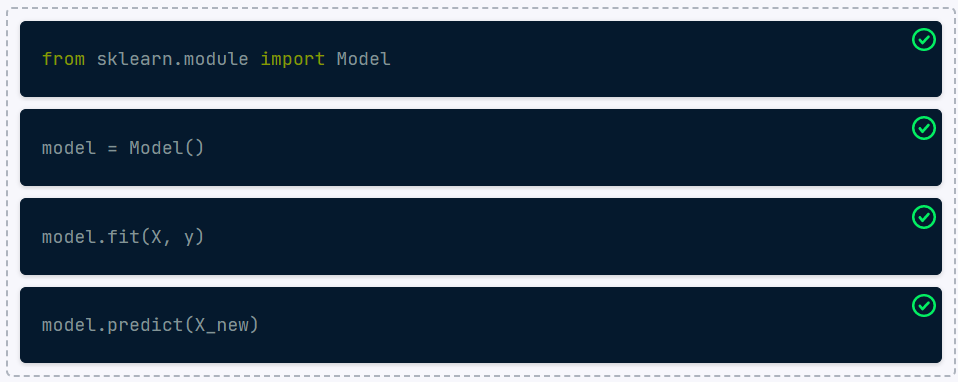

In [ ]:
from PIL import Image
image = Image.open('1.png')
image.show()

## The classification challenge
### 1. The classification challenge

Previously, we learned that supervised learning uses labels. Let's discuss how we can build a classification model, or classifier, to predict the labels of unseen data.

### 2. Classifying labels of unseen data

There are four steps. First, we build a classifier, which learns from the labeled data we pass to it. We then pass it unlabeled data as input, and have it predict labels for this unseen data. As the classifier learns from the labeled data, we call this the training data.

### 3. k-Nearest Neighbors

Let's build our first model! We'll use an algorithm called k-Nearest Neighbors, which is popular for classification problems. The idea of k-Nearest Neighbors, or KNN, is to predict the label of any data point by looking at the k, for example, three, closest labeled data points and getting them to vote on what label the unlabeled observation should have. KNN uses majority voting, which makes predictions based on what label the majority of nearest neighbors have.

Using this scatter plot as an example, how do we classify the black observation?

If k equals three, we would classify it as red. This is because two of the three closest observations are red.

If k equals five, we would instead classify it as blue.

### 7. KNN Intuition

To build intuition for KNN, let's look at this scatter plot displaying total evening charge against total day charge for customers of a telecom company. The observations are colored in blue for customers who have churned, and red for those who have not churned.

Here we have visualized the results of a KNN algorithm where the number of neighbors is set to 15. KNN creates a decision boundary to predict if customers will churn. Any customers in the area with a gray background are predicted to churn, and those in the area with a red background are predicted to not churn. This boundary would be used to make predictions on unseen data.

### 9. Using scikit-learn to fit a classifier

To fit a KNN model using scikit-learn, we import KNeighborsClassifier from sklearn-dot-neighbors. We split our data into X, a 2D array of our features, and y, a 1D array of the target values - in this case, churn status. scikit-learn requires that the features are in an array where each column is a feature and each row a different observation. Similarly, the target needs to be a single column with the same number of observations as the feature data. We use the dot-values attribute to convert X and y to NumPy arrays. Printing the shape of X and y, we see there are 3333 observations of two features, and 3333 observations of the target variable. We then instantiate our KNeighborsClassifier, setting n_neighbors equal to 15, and assign it to the variable knn. Then we can fit this classifier to our labeled data by applying the classifier's dot-fit method and passing two arguments: the feature values, X, and the target values, y.

### 10. Predicting on unlabeled data

Here we have a set of new observations, X_new. Checking the shape of X_new, we see it has three rows and two columns, that is, three observations and two features. We use the classifier's dot-predict method and pass it the unseen data as a 2D NumPy array containing features in columns and observations in rows. Printing the predictions returns a binary value for each observation or row in X_new. It predicts 1, which corresponds to 'churn', for the first observation, and 0, which corresponds to 'no churn', for the second and third observations.

## Measuring model performance

#### 1. Measuring model performance

Now we can make predictions using a classifier, but how do we know if the model is making correct predictions? We can evaluate its performance!

In classification, accuracy is a commonly-used metric. Accuracy is the number of correct predictions divided by the total number of observations.

How do we measure accuracy? We could compute accuracy on the data used to fit the classifier. However, as this data was used to train the model, performance will not be indicative of how well it can generalize to unseen data, which is what we are interested in!

#### 4. Computing accuracy

It is common to split data into a training set and a test set.

We fit the classifier using the training set,

then we calculate the model's accuracy against the test set's labels.

#### 7. Train/test split

To do this, we import train_test_split from sklearn-dot-model_selection. We call train_test_split, passing our features and targets. We commonly use 20-30% of our data as the test set. By setting the test_size argument to zero-point-three we use 30% here. The random_state argument sets a seed for a random number generator that splits the data. Using the same number when repeating this step allows us to reproduce the exact split and our downstream results. It is best practice to ensure our split reflects the proportion of labels in our data. So if churn occurs in 10% of observations, we want 10% of labels in our training and test sets to represent churn. We achieve this by setting stratify equal to y. train_test_split returns four arrays: the training data, the test data, the training labels, and the test labels. We unpack these into X_train, X_test, y_train, and y_test, respectively. We then instantiate a KNN model and fit it to the training data using the dot-fit method. To check the accuracy, we use the dot-score method, passing X test and y test. The accuracy of our model is 88%, which is low given our labels have a 9 to 1 ratio.

#### 8. Model complexity

Let's discuss how to interpret k. Recall that we discussed decision boundaries, which are thresholds for determining what label a model assigns to an observation. In the image shown, as k increases, the decision boundary is less affected by individual observations, reflecting a simpler model. Simpler models are less able to detect relationships in the dataset, which is known as underfitting. In contrast, complex models can be sensitive to noise in the training data, rather than reflecting general trends. This is known as overfitting.

#### 9. Model complexity and over/underfitting

We can also interpret k using a model complexity curve. With a KNN model, we can calculate accuracy on the training and test sets using incremental k values, and plot the results. We create empty dictionaries to store our train and test accuracies, and an array containing a range of k values. We use a for loop to repeat our previous workflow, building several models using a different number of neighbors. We loop through our neighbors array and, inside the loop, we instantiate a KNN model with n_neighbors equal to the neighbor iterator, and fit to the training data. We then calculate training and test set accuracy, storing the results in their respective dictionaries.

#### 10. Plotting our results

After our for loop, we then plot the training and test values, including a legend and labels.

#### 11. Model complexity curve

Here's the result! As k increases beyond 15 we see overfitting where performance plateaus on both test and training sets, as indicated in this plot.

#### 12. Model complexity curve

The peak test accuracy actually occurs at around 13 neighbors.

# 2 Regression

## Introduction to regression

### 1. Introduction to regression

Now we're going to check out the other type of supervised learning: regression. In regression tasks, the target variable typically has continuous values, such as a country's GDP, or the price of a house.

### 2. Predicting blood glucose levels

To conceptualize regression problems, let's use a dataset containing women's health data to predict blood glucose levels. We load the dataset as a pandas DataFrame, and print the first five rows. It contains features including number of pregnancies, triceps skinfold measurements, insulin levels, body mass index, known as BMI, age in years, and diabetes status, with one indicating a diagnosis, and zero representing the absence of a diagnosis.

### 3. Creating feature and target arrays

Recall that scikit-learn requires features and target values in distinct variables, X and y. To use all of the features in our dataset, we drop our target, blood glucose levels, and store the values attribute as X. For y, we take the the target column's values attribute. We can print the type for X and y to confirm they are now both NumPy arrays.

### 4. Making predictions from a single feature

To start, let's try to predict blood glucose levels from a single feature: body mass index. To do this, we slice out the BMI column of X, which is the fourth column, storing as the variable X_bmi. Checking the shape of y and X_bmi, we see that they are both one-dimensional arrays. This is fine for y, but our features must be formatted as a two-dimensional array to be accepted by scikit-learn. To convert the shape of X_bmi we apply NumPy's dot-reshape method, passing minus one followed by one. Printing the shape again shows X_bmi is now the correct shape for our model.

### 5. Plotting glucose vs. body mass index

Now, let's plot blood glucose levels as a function of body mass index. We import matplotlib-dot-pyplot as plt, then pass X_bmi and y to plt-dot-scatter. We'll also label our axes using the xlabel and ylabel methods.

### 6. Plotting glucose vs. body mass index

We can see that, generally, as body mass index increases, blood glucose levels also tend to increase.

### 7. Fitting a regression model

It's time to fit a regression model to our data. We're going to use a model called linear regression, which fits a straight line to our data. We will explain the mechanics of linear regression in the next video, but first, let's see how to fit it and plot predictions. We import LinearRegression from sklearn-dot-linear_model, and instantiate our regression model. As we are modeling the relationship between the feature, body mass index, and the target, blood glucose levels, rather than predicting target values for new observations, we fit the model to all of our feature observations. We do this by calling reg-dot-fit and passing in the feature data and the target variable, the same as we did for classification problems. After this, we can create the predictions variable by calling reg-dot-predict and passing in our features. As we are predicting the target values of the features used to train the model, this gives us a line of best fit for our data. We produce our scatter plot again, and then call plt-dot-plot to produce a line plot, passing our features, X_bmi, followed by our predictions.

### 8. Fitting a regression model

The black line represents the linear regression model's fit of blood glucose values against body mass index, which appears to have a weak-to-moderate positive correlation.

## The basics of linear regression

### 1. The basics of linear regression

So, how does linear regression work?

### 2. Regression mechanics

We want to fit a line to the data, and in two dimensions this takes the form of y equals ax plus b. Using a single feature is known as simple linear regression, where y is the target, x is the feature, and a and b are the model parameters that we want to learn. a and b are also called the model coefficients, or the slope and intercept, respectively. So how do we accurately choose values for a and b? We can define an error function for any given line and then choose the line that minimizes this function. Error functions are also called loss or cost functions.

### 3. The loss function

Let's visualize a loss function using this scatter plot. We want the line to be as close to the

observations as possible. Therefore, we want to minimize the vertical distance between the fit and the data. So for each observation,

we calculate the vertical distance between it and the line.

This distance is called a residual. We could try to minimize the sum of the residuals, but then each positive residual would cancel out each negative residual. To avoid this, we square the residuals. By adding all the squared residuals, we calculate the residual sum of squares, or RSS. This type of linear regression is called Ordinary Least Squares, or OLS, where we aim to minimize the RSS.

### 9. Linear regression in higher dimensions

When we have two features, x1 and x2, and one target, y, a line takes the form y = a1x1 + a2x2 + b. So to fit a linear regression model we specify three variables, a1, a2, and the intercept, b. When adding more features, it is known as multiple linear regression. Fitting a multiple linear regression model means specifying a coefficient, a n, for n number of features, and b. For multiple linear regression models, scikit-learn expects one variable each for feature and target values.

### 10. Linear regression using all features

Let's perform linear regression to predict blood glucose levels using all of the features from the diabetes dataset. We import LinearRegression from sklearn-dot-linear_model. Then we split the data into training and test sets, instantiate the model, fit it on the training set, and predict on the test set. Note that linear regression in scikit-learn performs OLS under the hood.

### 11. R-squared

The default metric for linear regression is R-squared, which quantifies the amount of variance in the target variable that is explained by the features. Values can range from zero to one, with one meaning the features completely explain the target's variance. Here are two plots visualizing high and low R-squared respectively.

### 12. R-squared in scikit-learn

To compute R-squared, we call the model's dot-score method, passing the test features and targets. Here the features only explain about 35 percent of blood glucose level variance.

### 13. Mean squared error and root mean squared error

Another way to assess a regression model's performance is to take the mean of the residual sum of squares. This is known as the mean squared error, or MSE. MSE is measured in units of our target variable, squared. For example, if a model is predicting a dollar value, MSE will be in dollars squared. To convert to dollars, we can take the square root, known as the root mean squared error, or RMSE.

### 14. RMSE in scikit-learn

To calculate RMSE, we import mean_squared_error from sklearn-dot-metrics, then call mean_squared_error. We pass y_test and y_pred, and set squared equal to False, which returns the square root of the MSE. The model has an average error for blood glucose levels of around 24 milligrams per deciliter.

## Cross-validation

### 1. Cross-validation

Great work on those regression challenges! Hopefully we are now feeling familiar with train test split and computing model performance metrics on our test set. But, there is a potential pitfall of this process.

### 2. Cross-validation motivation

If we're computing R-squared on our test set, the R-squared returned is dependent on the way that we split up the data! The data points in the test set may have some peculiarities that mean the R-squared computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially a random split, we use a technique called cross-validation.

### 3. Cross-validation basics

We begin by splitting the dataset into five groups or folds.

Then we set aside the first fold as a test set, fit our model on the remaining four folds, predict on our test set, and compute the metric of interest, such as R-squared.

Next, we set aside the second fold as our test set, fit on the remaining data, predict on the test set, and compute the metric of interest.

Then similarly with the third fold, the fourth fold, and the fifth fold. As a result we get five values of R-squared from which we can compute statistics of interest, such as the mean, median, and 95% confidence intervals.

### 13. Cross-validation and model performance

As we split the dataset into five folds, we call this process 5-fold cross-validation. If we use 10 folds, it is called 10-fold cross-validation. More generally, if we use k folds, it is called k-fold cross-validation or k-fold CV. There is, however, a trade-off. Using more folds is more computationally expensive. This is because we are fitting and predicting more times.

### 14. Cross-validation in scikit-learn

To perform k-fold cross-validation in scikit-learn, we import cross_val_score from sklearn-dot-model_selection. We also import KFold, which allows us to set a seed and shuffle our data, making our results repeatable downstream. We first call KFold. The n_splits argument has a default of five, but in this case we assign six, allowing us to use six folds from our dataset for cross-validation. We also set shuffle to True, which shuffles our dataset before splitting into folds. We also assign a seed to the random_state keyword argument, ensuring our data would be split in the same way if we repeat the process making the results repeatable downstream. We save this as the variable kf. As usual, we instantiate our model, in this case, linear regression. We then call cross_val_score, passing the model, the feature data, and the target data as the first three positional arguments. We also specify the number of folds by setting the keyword argument cv equal to our kf variable. This returns an array of cross-validation scores, which we assign to cv_results. The length of the array is the number of folds utilized. Note that the score reported is R squared, as this is the default score for linear regression.

### 15. Evaluating cross-validation peformance

We can now print the scores. This returns six results ranging from zero-point-seven to approximately zero-point-seven-seven. We can calculate the mean score using np-dot-mean, and the standard deviation using np-dot-std. Additionally, we can calculate the 95% confidence interval using the np-dot-quantile function, passing our results followed by a list containing the upper and lower limits of our interval as decimals.

## Regularized regression 

### 1. Regularized regression

Now let's explore regularization in regression, a technique used to avoid overfitting.

### 2. Why regularize?

Recall that fitting a linear regression model minimizes a loss function to choose a coefficient, a, for each feature, and the intercept, b. If we allow these coefficients to be very large, we can get overfitting. Therefore, it is common practice to alter the loss function so that it penalizes large coefficients. This is called regularization.

### 3. Ridge regression

The first type of regularized regression that we'll look at is called ridge. With ridge, we use the Ordinary Least Squares loss function plus the squared value of each coefficient, multiplied by a constant, alpha. So, when minimizing the loss function, models are penalized for coefficients with large positive or negative values. When using ridge, we need to choose the alpha value in order to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha for ridge is similar to picking k in KNN. Alpha in ridge is known as a hyperparameter, which is a variable used for selecting a model's parameters. Alpha controls model complexity. When alpha equals zero, we are performing OLS, where large coefficients are not penalized and overfitting may occur. A high alpha means that large coefficients are significantly penalized, which can lead to underfitting.

### 4. Ridge regression in scikit-learn

To perform ridge regression in scikit-learn, we import Ridge from sklearn-dot-linear_model. To highlight the impact of different alpha values, we create an empty list for our scores, then loop through a list of different alpha values. Inside the for loop we instantiate Ridge, setting the alpha keyword argument equal to the iterator, also called alpha. We fit on the training data, and predict on the test data. We save the model's R-squared value to the scores list. Finally, outside of the loop, we print the scores for the models with five different alpha values. We see performance gets worse as alpha increases.

### 5. Lasso regression

There is another type of regularized regression called lasso, where our loss function is the OLS loss function plus the absolute value of each coefficient multiplied by some constant, alpha.

### 6. Lasso regression in scikit-learn

To use Lasso we import it from sklearn-dot-linear_model. The actual method for performing lasso regression in scikit-learn mirrors ridge regression, as we can see here. Performance drops substantially as alpha goes over 20!

### 7. Lasso regression for feature selection

Lasso regression can actually be used to assess feature importance. This is because it tends to shrink the coefficients of less important features to zero. The features whose coefficients are not shrunk to zero are selected by the lasso algorithm. Let's check this out in practice.

### 8. Lasso for feature selection in scikit-learn

We import Lasso. Next, we create our feature and target arrays, and use the dataset's dot-columns attribute to access the feature names and store as the variable names. As we are calculating feature importance we use the entire dataset, rather than splitting it. We then instantiate Lasso, setting alpha to zero-point-one. We fit the model to the data and extract the coefficients using the dot-coef-underscore attribute, storing as lasso_coef. We then plot the coefficients for each feature.

### 9. Lasso for feature selection in scikit-learn

We can see that the most important predictor for our target variable, blood glucose levels, is the binary value for whether an individual has diabetes or not! This is not surprising, but is a great sanity check. This type of feature selection is very important because it allows us to communicate results to non-technical audiences. It is also useful for identifying which factors are important predictors for various physical phenomena.

# 3 Fine-Tuning Your Model

## How good is your model?

1. How good is your model?

Thinking back to classification problems,

2. Classification metrics

recall that we can use accuracy, the fraction of correctly classified labels, to measure model performance. However, accuracy is not always a useful metric.

3. Class imbalance

Consider a model for predicting whether a bank transaction is fraudulent, where only 1% of transactions are actually fraudulent. We could build a model that classifies every transaction as legitimate; this model would have an accuracy of 99%! However, it does a terrible job of actually predicting fraud, so it fails at its original purpose. The situation where one class is more frequent is called class imbalance. Here, the class of legitimate transactions contains way more instances than the class of fraudulent transactions. This is a common situation in practice and requires a different approach to assessing the model's performance.

4. Confusion matrix for assessing classification performance

Given a binary classifier, such as our fraudulent transactions example, we can create a 2-by-2 matrix that summarizes performance called a confusion matrix.

5. Assessing classification performance

Across the top are the predicted labels, and down the side are the actual labels.

Given any model, we can fill in the confusion matrix according to its predictions.

The true positives are the number of fraudulent transactions correctly labeled;

The true negatives are the number of legitimate transactions correctly labeled;

The false negatives are the number of legitimate transactions incorrectly labeled;

And the false positives are the number of transactions incorrectly labeled as fraudulent.

Usually, the class of interest is called the positive class. As we aim to detect fraud, the positive class is an illegitimate transaction. So why is the confusion matrix important? Firstly, we can retrieve accuracy: it's the sum of true predictions divided by the total sum of the matrix.

13. Precision

Secondly, there are other important metrics we can calculate from the confusion matrix. Precision is the number of true positives divided by the sum of all positive predictions. It is also called the positive predictive value. In our case, this is the number of correctly labeled fraudulent transactions divided by the total number of transactions classified as fraudulent. High precision means having a lower false positive rate. For our classifier, this translates to fewer legitimate transactions being classified as fraudulent.

14. Recall

Recall is the number of true positives divided by the sum of true positives and false negatives. This is also called sensitivity. High recall reflects a lower false negative rate. For our classifier, it means predicting most fraudulent transactions correctly.

15. F1 score

The F1-score is the harmonic mean of precision and recall. This metric gives equal weight to precision and recall, therefore it factors in both the number of errors made by the model and the type of errors. The F1 score favors models with similar precision and recall, and is a useful metric if we are seeking a model which performs reasonably well across both metrics.

16. Confusion matrix in scikit-learn

Using our churn dataset, to compute the confusion matrix, along with the metrics, we import classification_report and confusion_matrix from sklearn-dot-metrics. We instantiate our classifier, split the data, fit the training data, and predict the labels of the test set.

We pass the test set labels and the predicted labels to the confusion matrix function. We can see 1106 true negatives in the top left.

18. Classification report in scikit-learn

Passing the same arguments to classification report outputs all the relevant metrics. It includes precision and recall by class, point-seven-six and point-one-six for the churn class respectively, which highlights how poorly the model's recall is on the churn class. Support represents the number of instances for each class within the true labels.

## Deciding on a primary metric
As you have seen, several metrics can be useful to evaluate the performance of classification models, including accuracy, precision, recall, and F1-score.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.

Answer the question

+ A model predicting if a customer is a high-value lead for a sales team with limited capacity.

## Logistic regression and the ROC curve

### 2. Logistic regression for binary classification

Despite its name, logistic regression is used for classification. This model calculates the probability, p, that an observation belongs to a binary class. Using our diabetes dataset as an example, if p is more than or equal to zero-point-five, we label the data as one, representing a prediction that an individual is more likely to have diabetes; if p is less than zero-point-five, we label it zero to represent that they are more likely to not have diabetes.

### 3. Linear decision boundary

Note that logistic regression produces a linear decision boundary, as we can see in this image.

### 4. Logistic regression in scikit-learn

Using logistic regression in scikit-learn follows the same approach as used for other models. We first import LogisticRegression from sklearn-dot-linear_model. Next we instantiate the classifier, split our data, fit the model on our training data, and predict on our test set. In this video we use the churn dataset.

### 5. Predicting probabilities

We can predict probabilities of each instance belonging to a class by calling logistic regression's predict_proba method and passing the test features. This returns a 2-dimensional array with probabilities for both classes, in this case, that the individual did not churn, or did churn, respectively. We slice the second column, representing the positive class probabilities, and store the results as y_pred_probs. Here we see the model predicts a probability of point-zero-eight-nine that the first observation has churned.

### 6. Probability thresholds

The default probability threshold for logistic regression in scikit-learn is zero-point-five. This threshold can also apply to other models such as KNN. So what happens as we vary this threshold?

### 7. The ROC curve

We can use a receiver operating characteristic, or ROC curve, to visualize how different thresholds affect true positive and false positive rates. Here, the dotted line represents a chance model, which randomly guesses labels.

When the threshold equals zero, the model predicts one for all observations, meaning it will correctly predict all positive values, and incorrectly predict all negative values.

If the threshold equals one, the model predicts zero for all data, which means that both true and false positive rates are zero. If we vary the threshold, we get a series of different false positive and true positive rates.

A line plot of the thresholds helps to visualize the trend.

### 13. Plotting the ROC curve

To plot the ROC curve, we import roc_curve from sklearn-dot-metrics. We then call the function roc_curve; we pass the test labels as the first argument, and the predicted probabilities as the second. We unpack the results into three variables: false positive rate, FPR; true positive rate, TPR; and the thresholds. We can then plot a dotted line from zero to one, along with the FPR and TPR;

### 14. Plotting the ROC curve

to produce a figure such as this. This looks great, but how do we quantify the model's performance based on this plot?

### 15. ROC AUC

If we have a model with one for true positive rate and zero for false positive rate, this would be the perfect model. Therefore, we calculate the area under the ROC curve, a metric known as AUC. Scores range from zero to one, with one being ideal. Here, the model scores point-six-seven, which is only 34% better than a model making random guesses.

### 16. ROC AUC in scikit-learn

We can calculate AUC in scikit-learn by importing roc_auc_score from sklearn-dot-metrics. We call roc_auc_score, passing our test labels and our predicted probabilities, calculated by using the model's predict_proba method on X_test. As expected, we get a score of zero-point-six-seven.

## Hyperparameter tuning

1. Hyperparameter tuning

Now that we know how to evaluate model performance, let's explore how to optimize our model.

Recall that we had to choose a value for alpha in ridge and lasso regression before fitting it. Likewise, before fitting and predicting KNN, we choose n_neighbors. Parameters that we specify before fitting a model, like alpha and n_neighbors, are called hyperparameters. So, a fundamental step for building a successful model:

3. Choosing the correct hyperparameters

is choosing the correct hyperparameters. We can try lots of different values, fit all of them separately, see how well they perform, and choose the best values! This is called hyperparameter tuning. When fitting different hyperparameter values, we use cross-validation to avoid overfitting the hyperparameters to the test set. We can still split the data, but perform cross-validation on the training set. We withhold the test set and use it for evaluating the tuned model.

4. Grid search cross-validation

One approach for hyperparameter tuning is called grid search, where we choose a grid of possible hyperparameter values to try. For example, we can search across two hyperparameters for a KNN model - the type of metric and a different number of neighbors. Here we have n neighbors between two and eleven in increments of three, and two metrics: euclidean and manhattan. Therefore, we can create a grid of values like this.

We perform k-fold cross-validation for each combination of hyperparameters. The mean scores for each combination are shown here.

We then choose hyperparameters that performed best, as shown here.

7. GridSearchCV in scikit-learn

Let's perform a grid search on a regression model using our sales dataset. We import GridSearchCV from sklearn-dot-model_selection. We instantiate KFold. We then specify the names and values of the hyperparameters we wish to tune as the keys and values of a dictionary, param_grid. As always, we instantiate our model. We then call GridSearchCV and pass it our model, the grid we wish to tune over and set cv equal to kf. This returns a GridSearch object that we can then fit to the training data, and this fit performs the actual cross-validated grid search. We can then print the model's attributes best-params-underscore and best-score-underscore, respectively, to retrieve the hyperparameters that perform the best along with the mean cross-validation score over that fold.

8. Limitations and an alternative approach

Grid search is great. However, the number of fits is equal to the number of hyperparameters multiplied by the number of values multiplied by the number of folds. Therefore, it doesn't scale well! So, performing 3-fold cross-validation for one hyperparameter with 10 values each means 30 fits, while 10-fold cross-validation on 3 hyperparameters with 10 values each equals 900 fits! However, there is another way.

9. RandomizedSearchCV

We can perform a random search, which picks random hyperparameter values rather than exhaustively searching through all options. Let's demonstrate this approach. We import RandomizedSearchCV from sklearn-dot-model_selection. We set up KFold and param_grid, and instantiate the model as before. We call RandomizedSearchCV using the same arguments and variables as GridSearchCV. We can optionally set the n_iter argument, which determines the number of hyperparameter values tested. So five-fold cross-validation with n_iter set to two performs 10 fits. Again we can access the best hyperparameters and their score. In this case it is able to find the best hyperparameters from our previous grid search!

10. Evaluating on the test set

We can evaluate model performance on the test set by passing it to a call of the random search object's dot-score method. It actually performs slightly better than the best score in our grid search!

# 4 Preprocessing and Pipelines¶
​

## Preprocessing data
2. scikit-learn requirements

Recall that scikit-learn requires numeric data, with no missing values. All the data that we have used so far has been in this format. However, with real-world data, this will rarely be the case, and instead we need to preprocess our data before we can build models.

3. Dealing with categorical features

Say we have a dataset containing categorical features, such as color. As these are not numeric, scikit-learn will not accept them and we need to convert them into numeric features. We achieve this by splitting the feature into multiple binary features called dummy variables, one for each category. Zero means the observation was not that category, while one means it was.

4. Dummy variables

Say we are working with a music dataset that has a genre feature with ten values such as Electronic, Hip-Hop, and Rock.

We create binary features for each genre. As each song has one genre, each row will have a 1 in one of the ten columns and zeros in the rest. If a song is not any of the first nine genres, then implicitly, it is a rock song. That means we only need nine features, so we can

delete the Rock column. If we do not do this, we are duplicating information, which might be an issue for some models.

7. Dealing with categorical features in Python

To create dummy variables we can use scikit-learn's OneHotEncoder, or pandas' get_dummies. We will use get_dummies.

8. Music dataset

We will be working with a music dataset in this chapter, for both classification and regression problems. Initially, we will build a regression model using all features in the dataset to predict song popularity. There is one categorical feature, genre, with ten possible values.

9. EDA w/ categorical feature

This box plot shows how popularity varies by genre. Let's encode this feature using dummy variables.

10. Encoding dummy variables

We import pandas, read in the DataFrame, and call pd-dot-get_dummies, passing the categorical column. As we only need to keep nine out of our ten binary features, we can set the drop_first argument to True. Printing the first five rows, we see pandas creates nine new binary features. The first song is Jazz, and the second is Rap, indicated by a 1 in the respective columns. To bring these binary features back into our original DataFrame we can use pd-dot-concat, passing a list containing the music DataFrame and our dummies DataFrame, and setting axis equal to one. Lastly, we can remove the original genre column using df-dot-drop, passing the column, and setting axis equal to one.

11. Encoding dummy variables

If the DataFrame only has one categorical feature, we can pass the entire DataFrame, thus skipping the step of combining variables. If we don't specify a column, the new DataFrame's binary columns will have the original feature name prefixed, so they will start with genre-underscore - as shown here. Notice the original genre column is automatically dropped. Once we have dummy variables, we can fit models as before.

12. Linear regression with dummy variables

Using the music_dummies DataFrame, the process for creating training and test sets remains unchanged. To perform cross-validation we then create a KFold object, instantiate a linear regression model, and call cross_val_score. We set scoring equal to neg_mean_squared_error, which returns the negative MSE. This is because scikit-learn's cross-validation metrics presume a higher score is better, so MSE is changed to negative to counteract this. We can calculate the training RMSE by taking the square root and converting to positive, achieved by calling numpy-dot-square-root and passing our scores with a minus sign in front.

## Handling missing data

2. Missing data

When there is no value for a feature in a particular row, we call it missing data. This can happen because there was no observation or the data might be corrupt. Whatever the reason, we need to deal with it.

3. Music dataset

Previously we worked with a modified music dataset. Now let's inspect the original version, which contains one thousand rows. We do this by chaining pandas' dot-isna with dot-sum and dot-sort_values. Each feature is missing between 8 and 200 values!

4. Dropping missing data

A common approach is to remove missing observations accounting for less than 5% of all data. To do this, we use pandas' dot-dropna method, passing a list of columns with less than 5% missing values to the subset argument. If there are missing values in our subset column, the entire row is removed. Rechecking the DataFrame, we see fewer missing values.

5. Imputing values

Another option is to impute missing data. This means making an educated guess as to what the missing values could be. We can impute the mean of all non-missing entries for a given feature. We can also use other values like the median. For categorical values we commonly impute the most frequent value. Note we must split our data before imputing to avoid leaking test set information to our model, a concept known as data leakage.

6. Imputation with scikit-learn

Here is a workflow for imputation to predict song popularity. We import SimpleImputer from sklearn-dot-impute. As we will use different imputation methods for categorical and numeric features, we first split them, storing as X_cat and X_num respectively, along with our target array as y. We create categorical training and test sets. We repeat this for the numeric features. By using the same value for the random_state argument, the target arrays' values remain unchanged. To impute missing categorical values we instantiate a SimpleImputer, setting strategy as most frequent. By default, SimpleImputer expects NumPy-dot-NaN to represent missing values. Now we call dot-fit_transform to impute the training categorical features' missing values! For the test categorical features, we call dot-transform.

7. Imputation with scikit-learn

For our numeric data, we instantiate another imputer. By default, it fills values with the mean. We fit and transform the training features, and transform the test features. We then combine our training data using numpy-dot-append, passing our two arrays, and set axis equal to 1. We repeat this for our test data. Due to their ability to transform our data, imputers are known as transformers.

8. Imputing within a pipeline

We can also impute using a pipeline, which is an object used to run a series of transformations and build a model in a single workflow. To do this, we import Pipeline from sklearn-dot-pipeline. Here we perform binary classification to predict whether a song is rock or another genre. We drop missing values accounting for less than five percent of our data. We convert values in the genre column, which will be the target, to a 1 if Rock, else 0, using numpy-dot-where. We then create X and y.

9. Imputing within a pipeline

To build a pipeline we construct a list of steps containing tuples with the step names specified as strings, and instantiate the transformer or model. We pass this list when instantiating a Pipeline. We then split our data, and fit the pipeline to the training data, as with any other model. Finally, we compute accuracy. Note that, in a pipeline, each step but the last must be a transformer.

## Centering and scaling

1. Centering and scaling

Data imputation is one of several important preprocessing steps for machine learning. Now let's cover another: centering and scaling our data.

2. Why scale our data?

Let's use df-dot-describe to check out the ranges of some of our feature variables in the music dataset. We see that the ranges vary widely: duration_ms ranges from zero to one-point-six-two million, speechiness contains only decimal places, and loudness only has negative values!

3. Why scale our data?

Many machine learning models use some form of distance to inform them, so if we have features on far larger scales, they can disproportionately influence our model. For example, KNN uses distance explicitly when making predictions. For this reason, we actually want features to be on a similar scale. To achieve this, we can normalize or standardize our data, often referred to as scaling and centering.

4. How to scale our data

There are several ways to scale our data: given any column, we can subtract the mean and divide by the variance so that all features are centered around zero and have a variance of one. This is called standardization. We can also subtract the minimum and divide by the range of the data so the normalized dataset has minimum zero and maximum one. Or, we can center our data so that it ranges from -1 to 1 instead. In this video, we will perform standardization, but scikit-learn has functions available for other types of scaling.

5. Scaling in scikit-learn

To scale our features, we import StandardScaler from sklearn-dot-preprocessing. We create our feature and target arrays. Before scaling, we split our data to avoid data leakage. We then instantiate a StandardScaler object, and call its fit_transform method, passing our training features. Next, we use scaler-dot-transform on the test features. Looking at the mean and standard deviation of the columns of both the original and scaled data verifies the change has taken place.

6. Scaling in a pipeline

We can also put a scaler in a pipeline! Here we build a pipeline object to scale our data and use a KNN model with six neighbors. We then split our data, fit the pipeline to our training set, and predict on our test set. Computing the accuracy yields a result of zero-point-eight-one. Let's compare this to using unscaled data.

7. Comparing performance using unscaled data
02:42 - 02:57
Here we fit a KNN model to our unscaled training data and print the accuracy. It is only zero-point-five-three, so just by scaling our data we improved accuracy by over 50 percent!

8. CV and scaling in a pipeline

Let's also look at how we can use cross-validation with a pipeline. We first build our pipeline. We then specify our hyperparameter space by creating a dictionary: the keys are the pipeline step name followed by a double underscore, followed by the hyperparameter name. The corresponding value is a list or an array of the values to try for that particular hyperparameter. In this case, we are tuning n_neighbors in the KNN model. Next we split our data into training and test sets. We then perform a grid search over our parameters by instantiating the GridSearchCV object, passing our pipeline and setting the param_grid argument equal to parameters. We then fit it to our training data. Lastly, we make predictions using our test set.

9. Checking model parameters

Printing GridSearchCV's best_score_ attribute, we see the score is very slightly better than our previous model's performance. Printing the best parameters, the optimal model has 12 neighbors.

## Evaluating multiple models

1. Evaluating multiple models

We've covered all parts of the supervised learning workflow. But how do we decide which model to use in the first place?

2. Different models for different problems

This is a complex question, and the answer depends on our situation. However, there are some principles that can guide us when making this decision. The size of our dataset plays a role. Fewer features means a simpler model, and can reduce training time. Also, some models, such as Artificial Neural Networks, require a lot of data to perform well. We may need an interpretable model, so we can explain to stakeholders how predictions were made. An example is linear regression, where we can calculate and interpret the model coefficients. Alternatively, flexibility might be important to get the most accurate predictions. Generally, flexible models make fewer assumptions about the data; for example, a KNN model does not assume a linear relationship between the features and the target.

3. It's all in the metrics

Notice that scikit-learn allows the same methods to be used for most models. This makes it easy to compare them! Regression models can be evaluated using the root mean squared error, or the R-squared value. Likewise, classification models can all be analyzed using accuracy, a confusion matrix and its associated metrics, or the ROC AUC. Therefore, one approach is to select several models and a metric, then evaluate their performance without any form of hyperparameter tuning.

4. A note on scaling

Recall that the performance of some models, such as KNN, linear regression, and logistic regression, are affected by scaling our data. Therefore, it is generally best to scale our data before evaluating models out of the box.

5. Evaluating classification models

We will evaluate three models for binary classification of song genre: KNN, logistic regression, and a new model called a decision tree classifier. We import our required modules, including DecisionTreeClassifier from sklearn-dot-tree. The workings of decision trees are outside the scope of this course, but the steps for building this model are the same as for other models in scikit-learn. As usual, we create our feature and target arrays, then split our data. We then scale our features using the scaler's dot-fit_transform method on the training set, and the dot-transform method on the test set.

6. Evaluating classification models

We create a dictionary with our model names as strings for the keys, and instantiate models as the dictionary's values. We also create an empty list to store the results. Now we loop through the models in our models dictionary, using its dot-values method. Inside the loop, we instantiate a KFold object. Next we perform cross-validation, using the model being iterated, along with our scaled training features, and target training array. We set cv equal to our kfold variable. By default, the scoring here will be accuracy. We then append the cross-validation results to our results list. Lastly, outside of the loop, we create a boxplot of our results, and set the labels argument equal to a call of models-dot-keys to retrieve each model's name.

7. Visualizing results

The output shows us the range of cross-validation accuracy scores. We can also see each model's median cross-validation score, represented by the orange line in each box. We can see logistic regression has the best median score.

8. Test set performance

To evaluate on the test set we loop through the names and values of the dictionary using the dot-items method. Inside the loop we fit the model, calculate accuracy, and print it. Logistic regression performs best for this problem if we are using accuracy as the metric.